## Assignment 5
#### DATA623
*Phuong Nguyen*

### What are the characteristics of the patient groups (aspirin and high heparin)?

##### Discuss the methods (data source, variables, how you approached the question, etc) as well as describe the results that answer the specific question

#### Method

In this notebook, the characteristics of the patients groups that have been allocated with aspirin and high heparin will be investigated. The dataset is the International Stroke Trial which contains 19435 rows and 112 attributes. In order to answer the question of interest, the dataset will be cleaned with missing values and some features will be selected from 112 attributes, which are: RCONSC (conscious state), SEX (gender), AGE (age), RSLEEP (symptoms noted on waking Y/N), RSBP (systolic blood pressure mmHg), RDEF1 (Face deficit (Y/N/C=can't assess)), RDEF2 (Arm/hand deficit (Y/N/C=can't assess)), RDEF3 (Leg/foot deficit (Y/N/C=can't assess)), RDEF4 (Dysphasia (Y/N/C=can't assess)), RDEF5 (Hemianopia (Y/N/C=can't assess)), RDEF6 (Visuospatial disorder (Y/N/C=can't assess)), RDEF7 (Brainstem/cerebellar signs (Y/N/C=can't assess)), RXASP (Trial aspirin allocated (Y/N)), RXHEP (Trial heparin allocated (M/L/N)), DDIAGISC (Ischaemic stroke (Y/N/U=unknown)), DRSISC (Ischaemic recurrent stroke (Y/N/U=unknown)). Among these variables, only AGE and RSBP (systolic blood pressure) are conitnuous variabls, the rest are categorical ones. After that, clustering analysis will be applied into the dataset using K-Means (for continuous columns) and K-Modes (for categorical columns) - or K-Prototype which is established by Huang (1997). In order to evaluate the performance of the clustering, cross validated F1 score will be utitlized to figure out the distinctiveness of the clusters with Light Gradient Boosting Machine. In each cluster, the numerical variables will be intepreted using the average while the categorical ones using the mode. 

In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from kmodes.kprototypes import KPrototypes


In [47]:
data = pd.read_csv("IST_corrected.csv", sep=",", encoding="Latin-1")
data.head()

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,1,17,D,M,69,Y,NaN,Y,Y,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,10,F,M,76,Y,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,43,F,F,71,N,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,6,F,M,81,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,20,F,M,78,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19435 entries, 0 to 19434
Columns: 112 entries, HOSPNUM to NCB14
dtypes: float64(20), int64(29), object(63)
memory usage: 16.6+ MB


In [49]:
data.describe()

,HOSPNUM,RDELAY,AGE,RSBP,HOURLOCAL,MINLOCAL,DAYLOCAL,ONDRUG,DMAJNCHD,DSIDED,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
count,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19434.000000,149.000000,633.000000,...,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000
mean,200.055467,20.124363,71.715410,160.159197,15.581528,30.840340,4.084435,10.885561,9.590604,7.624013,...,0.011834,0.008284,0.020324,0.013378,0.041523,0.003036,0.006895,0.001132,0.008541,0.027322
std,160.335093,12.470330,11.619714,27.610382,12.076144,19.356143,1.842469,4.182254,22.408075,21.232532,...,0.108143,0.090641,0.141110,0.114890,0.199502,0.055015,0.082750,0.033627,0.092026,0.163024
min,1.000000,1.000000,16.000000,70.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,9.000000,65.000000,140.000000,11.000000,15.000000,3.000000,8.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,159.000000,19.000000,73.000000,160.000000,14.000000,30.000000,4.000000,14.000000,6.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,319.000000,29.000000,80.000000,180.000000,17.000000,45.000000,6.000000,14.000000,10.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,568.000000,48.000000,99.000000,295.000000,99.000000,99.000000,7.000000,14.000000,267.000000,368.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
data.HOSPNUM.count()

19435

In [51]:
data["COUNTRY"].unique()

array(['UK', 'ITAL', 'PORT', 'EIRE', 'BELG', 'FINL', 'AUSL', 'CZEC',
       'USA', 'HUNG', 'NETH', 'NEW', 'SWIT', 'AUST', 'SLOV', 'SPAI',
       'NORW', 'SWED', 'CHIL', 'GREE', 'POLA', 'TURK', 'SOUT', 'ISRA',
       'SLOK', 'CANA', 'HONG', 'BRAS', 'INDI', 'ARGE', 'DENM', 'FRAN',
       'SRI', 'ROMA', 'JAPA', 'SING'], dtype=object)

In [52]:
data1 = data.groupby(["RXASP", "RXHEP"]).sum().reset_index()
data1

,RXASP,RXHEP,HOSPNUM,RDELAY,AGE,RSBP,HOURLOCAL,MINLOCAL,DAYLOCAL,ONDRUG,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,N,H,1280,2590,8647,19112,5286,6600,493,1308.0,...,0,3,5,0,8,2,0,0,0,7
1,N,L,485009,48257,174451,391380,37519,73988,9958,26816.0,...,36,16,47,31,93,5,20,2,10,37
2,N,M,486558,45711,165395,368984,32572,67204,9395,25448.0,...,29,40,57,25,116,12,12,1,33,124
3,N,N,972236,98828,348048,777992,75715,151628,19788,52534.0,...,56,15,133,82,229,4,45,11,14,19
4,Y,H,1281,2533,8619,19992,5398,6681,462,1393.0,...,1,3,3,0,6,1,0,0,4,16
5,Y,L,488666,48897,173887,391481,38119,75081,9904,26723.0,...,28,19,24,26,69,9,13,2,20,59
6,Y,M,484599,46487,166092,367739,32671,69208,9472,25357.0,...,32,39,36,30,104,18,8,0,62,201
7,Y,N,968449,97814,348650,776014,75547,148992,19909,51971.0,...,48,26,90,66,182,8,36,6,23,68


In [77]:
# Choosing variables
data3 = data[["RCONSC","SEX", "AGE", "RSLEEP",  "RSBP", "RDEF1", "RDEF2", "RDEF3", "RDEF4", "RDEF5", "RDEF6", "RDEF7", "RXASP", "RXHEP", "DDIAGISC", "DRSISC"]]
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19435 entries, 0 to 19434
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RCONSC    19435 non-null  object
 1   SEX       19435 non-null  object
 2   AGE       19435 non-null  int64 
 3   RSLEEP    19435 non-null  object
 4   RSBP      19435 non-null  int64 
 5   RDEF1     19435 non-null  object
 6   RDEF2     19435 non-null  object
 7   RDEF3     19435 non-null  object
 8   RDEF4     19435 non-null  object
 9   RDEF5     19435 non-null  object
 10  RDEF6     19435 non-null  object
 11  RDEF7     19435 non-null  object
 12  RXASP     19435 non-null  object
 13  RXHEP     19435 non-null  object
 14  DDIAGISC  19412 non-null  object
 15  DRSISC    19417 non-null  object
dtypes: int64(2), object(14)
memory usage: 2.4+ MB


In [54]:
data3

,RCONSC,SEX,AGE,RSLEEP,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RXASP,RXHEP,DDIAGISC,DRSISC
0,D,M,69,Y,140,N,N,N,Y,N,Y,N,Y,N,Y,N
1,F,M,76,Y,150,Y,Y,Y,N,N,N,N,N,L,Y,N
2,F,F,71,N,170,Y,Y,Y,N,N,N,N,Y,N,Y,N
3,F,M,81,N,170,N,N,N,Y,N,N,N,N,H,Y,N
4,F,M,78,N,170,Y,Y,Y,N,N,N,N,Y,H,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19430,F,M,66,N,120,Y,Y,Y,Y,Y,C,N,N,L,Y,N
19431,F,M,75,N,210,Y,Y,Y,N,N,N,N,N,M,Y,N
19432,F,M,77,N,220,Y,Y,Y,N,N,N,N,N,N,Y,Y
19433,D,F,87,N,160,N,Y,Y,Y,C,C,N,N,N,Y,N


In [78]:
# Getting the data for high heparin
data3 = data3.loc[data3["RXHEP"]=="H"]
data3

,RCONSC,SEX,AGE,RSLEEP,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RXASP,RXHEP,DDIAGISC,DRSISC
3,F,M,81,N,170,N,N,N,Y,N,N,N,N,H,Y,N
4,F,M,78,N,170,Y,Y,Y,N,N,N,N,Y,H,Y,N
8,F,M,47,N,150,N,N,N,N,N,N,N,Y,H,Y,N
12,D,F,83,N,130,Y,Y,Y,Y,Y,N,N,N,H,N,N
16,D,F,64,Y,180,Y,Y,Y,N,Y,Y,N,Y,H,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,F,M,74,N,145,N,N,N,Y,N,N,N,N,H,Y,N
966,F,M,78,N,170,N,N,N,N,N,Y,Y,Y,H,Y,N
972,F,F,76,Y,160,N,N,N,N,N,N,Y,N,H,Y,N
975,F,M,71,N,200,Y,Y,N,Y,C,N,Y,Y,H,Y,N


In [79]:
# Checking missing values
data3.isna().sum()

RCONSC      0
SEX         0
AGE         0
RSLEEP      0
RSBP        0
RDEF1       0
RDEF2       0
RDEF3       0
RDEF4       0
RDEF5       0
RDEF6       0
RDEF7       0
RXASP       0
RXHEP       0
DDIAGISC    1
DRSISC      0
dtype: int64

In [80]:
# Dropping missing values
data3 = data3.dropna()
data3

,RCONSC,SEX,AGE,RSLEEP,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RXASP,RXHEP,DDIAGISC,DRSISC
3,F,M,81,N,170,N,N,N,Y,N,N,N,N,H,Y,N
4,F,M,78,N,170,Y,Y,Y,N,N,N,N,Y,H,Y,N
8,F,M,47,N,150,N,N,N,N,N,N,N,Y,H,Y,N
12,D,F,83,N,130,Y,Y,Y,Y,Y,N,N,N,H,N,N
16,D,F,64,Y,180,Y,Y,Y,N,Y,Y,N,Y,H,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,F,M,74,N,145,N,N,N,Y,N,N,N,N,H,Y,N
966,F,M,78,N,170,N,N,N,N,N,Y,Y,Y,H,Y,N
972,F,F,76,Y,160,N,N,N,N,N,N,Y,N,H,Y,N
975,F,M,71,N,200,Y,Y,N,Y,C,N,Y,Y,H,Y,N


In [81]:
# Select categorical columns
cat_colum = [data3.columns.get_loc(col) for col in list(data3.select_dtypes('object').columns)]

In [82]:
# Convert dataframe to matrix for clustering
data3_matrix = data3.to_numpy()
data3_matrix

array([['F', 'M', 81, ..., 'H', 'Y', 'N'],
       ['F', 'M', 78, ..., 'H', 'Y', 'N'],
       ['F', 'M', 47, ..., 'H', 'Y', 'N'],
       ...,
       ['F', 'F', 76, ..., 'H', 'Y', 'N'],
       ['F', 'M', 71, ..., 'H', 'Y', 'N'],
       ['F', 'M', 56, ..., 'H', 'Y', 'N']], dtype=object)

In [83]:
# Applying kprototype to the dataset
cost = []
for cluster in range(1,10):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters = cluster, init="Huang", random_state=0)
        kprototype.fit_predict(data3_matrix, categorical = cat_colum)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
        

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [84]:
# Cost of each cluster
data3_cost = pd.DataFrame({'Cluster': range(1,10), 'Cost':cost})
data3_cost

,Cluster,Cost
0,1,210691.936335
1,2,105259.758318
2,3,80445.513322
3,4,67967.557604
4,5,57784.477678
5,6,52292.965285
6,7,48482.141641
7,8,45374.019821
8,9,43030.299178


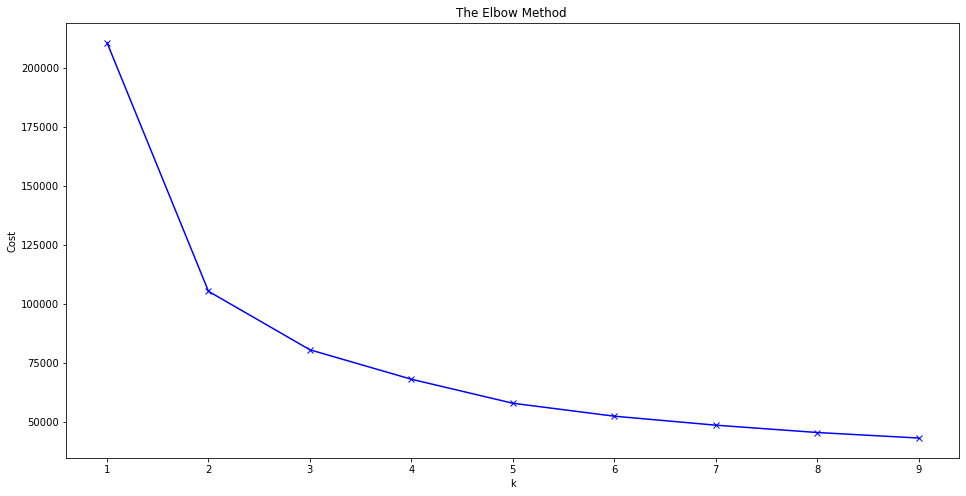

In [94]:
# Visualize the Elbow method
K = range(1,10)
plt.figure(figsize=(16,8))
plt.plot(K, cost, 'bx-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method ')
plt.show()

In [64]:
# Fit the cluster
kprototype = KPrototypes(n_jobs=-1, n_clusters = 3, init = "Huang", random_state=0)
kprototype.fit_predict(data3_matrix, categorical = cat_colum)
clusters = kprototype.fit_predict(data3_matrix, categorical = cat_colum)

In [65]:
pd.Series(clusters).value_counts()

1    119
2     88
0     37
dtype: int64

In [67]:
kprototype.cluster_centroids_

array([['72.4054054054054', '202.51351351351352', 'F', 'F', 'N', 'Y',
        'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'H', 'Y', 'N'],
       ['69.63865546218487', '138.71428571428572', 'F', 'M', 'N', 'Y',
        'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'H', 'Y', 'N'],
       ['70.57954545454545', '169.9318181818182', 'F', 'M', 'N', 'Y',
        'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'H', 'Y', 'N']], dtype='<U32')

In [88]:
# Add the cluster to the dataframe
data4 = data3.copy()
data4["Cluster Labels"] = kprototype.labels_
data4["Cluster"] = data4["Cluster Labels"].map({0:"One", 1:"Two", 2:"Three"})
# Order the cluster
data4["Cluster"] = data4["Cluster"].astype('category')
data4["Cluster"] = data4["Cluster"].cat.reorder_categories(["One", "Two", "Three"])

In [89]:
# putting results into dataframe with mean of numerical variables and mode of categorical ones
data4.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
data4.groupby("Cluster").agg(
    {
        "Total":"count",
        "RCONSC": lambda x: x.value_counts().index[0],
        "SEX": lambda x: x.value_counts().index[0],
        "AGE":"mean",
        "RSLEEP": lambda x: x.value_counts().index[0],
        "RSBP":"mean",
        "RDEF1": lambda x: x.value_counts().index[0],
        "RDEF2": lambda x: x.value_counts().index[0],
        "RDEF3": lambda x: x.value_counts().index[0],
        "RDEF4": lambda x: x.value_counts().index[0],
        "RDEF5": lambda x: x.value_counts().index[0],
        "RDEF6": lambda x: x.value_counts().index[0],
        "RDEF7": lambda x: x.value_counts().index[0],
        "RXASP": lambda x: x.value_counts().index[0],
        "RXHEP": lambda x: x.value_counts().index[0],
        "DDIAGISC": lambda x: x.value_counts().index[0],
        "DRSISC": lambda x: x.value_counts().index[0]
    }
).reset_index()



,Cluster,Total,RCONSC,SEX,AGE,RSLEEP,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RXASP,RXHEP,DDIAGISC,DRSISC
0,One,38,F,M,64.842105,N,145.657895,Y,Y,Y,N,N,N,N,N,H,Y,N
1,Two,41,F,M,76.975610,N,174.463415,Y,Y,Y,N,N,N,N,Y,H,Y,N
2,Three,34,F,F,72.294118,N,124.617647,Y,Y,Y,N,N,N,N,N,H,Y,N


In [90]:
data5 = data3.copy()

In [91]:
data5

,RCONSC,SEX,AGE,RSLEEP,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RXASP,RXHEP,DDIAGISC,DRSISC
3,F,M,81,N,170,N,N,N,Y,N,N,N,N,H,Y,N
4,F,M,78,N,170,Y,Y,Y,N,N,N,N,Y,H,Y,N
8,F,M,47,N,150,N,N,N,N,N,N,N,Y,H,Y,N
12,D,F,83,N,130,Y,Y,Y,Y,Y,N,N,N,H,N,N
16,D,F,64,Y,180,Y,Y,Y,N,Y,Y,N,Y,H,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,F,M,74,N,145,N,N,N,Y,N,N,N,N,H,Y,N
966,F,M,78,N,170,N,N,N,N,N,Y,Y,Y,H,Y,N
972,F,F,76,Y,160,N,N,N,N,N,N,Y,N,H,Y,N
975,F,M,71,N,200,Y,Y,N,Y,C,N,Y,Y,H,Y,N


In [92]:
# Convert to category type
data5 = data3.copy()
for i in data5.select_dtypes(include='object'):
    data5[i] = data5[i].astype('category')

In [75]:
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score

In [99]:
# Evaluate clustering
model = LGBMClassifier()
score_ = cross_val_score(model, data5,kprototype.labels_, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(score_)}')

CV F1 score for K-Prototypes clusters is 0.9143189235123508


#### Results
Using KPrototype, the dataset with aspirin and high heparin allocated patient were divided successfully into 3 clusters. Among all 3 clusters, the patients all had similar randomisation data such as: fully conscious state at randomisation, there were no symptoms noted on waking, they all had deficit in face, arm/hand and leg/foot but no dysphasia, hemianopia, visuospatial disorder or brainstem signs. All three clusters has patients with ischemic stroke but no recurrent stroke within 14 days. In cluster one,  the patients are suggested to be around 64 years old with abut 145 mmHg blood pressure. In cluster two and three, the patients are suggested to be around 76 and 72 years old respectively with 174 and 124 mmHg blood pressure respectively. Cluster 2 seem to has the highest patients' age and blood pressure with allocated aspirin and high heparin together. Moreover, the first 2 clusters suggested patients with gender Male and the third cluster suggested Female patients. In general, there are no specific distinguished characteristics between patient groups who were allocated with high heparin only and with both high heparin and aspirin. The F1 score for the clustering was about 91.43% which indicates the produced clusters are fairly distinguishable. The approach can also be expanded to the patients who were allocated with aspirin (Y) and compared with diffent allocated heparin dosage. 


#### References of package and method
@Misc{devos2015,
  author = {Nelis J. de Vos},
  title = {kmodes categorical clustering library},
  howpublished = {\url{https://github.com/nicodv/kmodes}},
  year = {2015--2021}
}


Huang, Z.: Clustering large data sets with mixed numeric and categorical values, Proceedings of the First Pacific Asia Knowledge Discovery and Data Mining Conference, Singapore, pp. 21-34, 1997.